In [2]:
import tensorflow as tf
import numpy as np

C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import cv2
from math import floor
from time import time

In [4]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


In [5]:
import matplotlib.image as mpi
import matplotlib.pyplot as plt
nums_page_high = mpi.imread('Numbers Page High Quality.jpg')
big_1_hq = nums_page_high[850:1300,600:900,:]
big_2_hq = nums_page_high[850:1300,1000:1350,:]
big_3_hq = nums_page_high[850:1300,1400:1750,:]
big_4_hq = nums_page_high[850:1300,1800:2150,:]
big_5_hq = nums_page_high[850:1300,2200:2600,:]
big_6_hq = nums_page_high[850:1300,2750:3100,:]
junk_hq = nums_page_high[1200:1300,2950:3100,:]
nums_page_med = mpi.imread('Numbers Page Med Quality.jpg')
big_1_mq = nums_page_med[275:450,175:300,:]
big_2_mq = nums_page_med[275:450,325:450,:]
nums_page_low = mpi.imread('Numbers Page Low Quality.jpg')
big_1_lq = nums_page_low[100:160,65:120,:]
big_2_lq = nums_page_low[100:160,115:175,:]

In [29]:
rgb2grey(big_1_hq).shape

(450, 300)

NameError: name 'x_train' is not defined

In [13]:
color2black(junk_hq).mean()

Flipping Black/White of this image


0.0

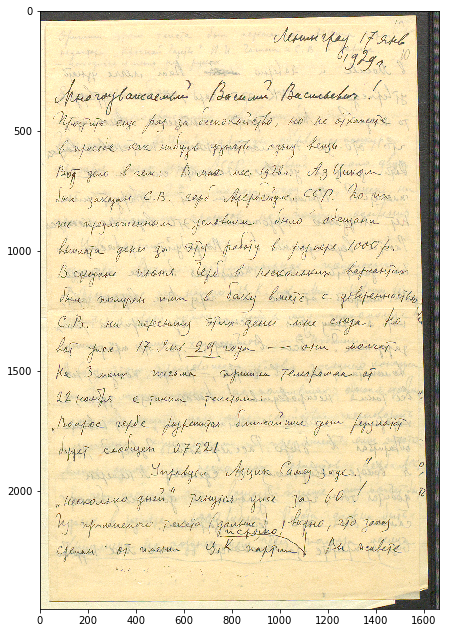

In [6]:
russian = mpi.imread("../Data/RGALI Documents/1.tif")
plt.figure(figsize=(8.5,11))
plt.imshow(russian)
plt.show()

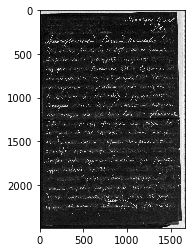

In [7]:
from skimage.color import rgb2grey
russian_grey = rgb2grey(russian)
plt.imshow(russian_grey, cmap = 'Greys')
plt.show()

Flipping Black/White of this image


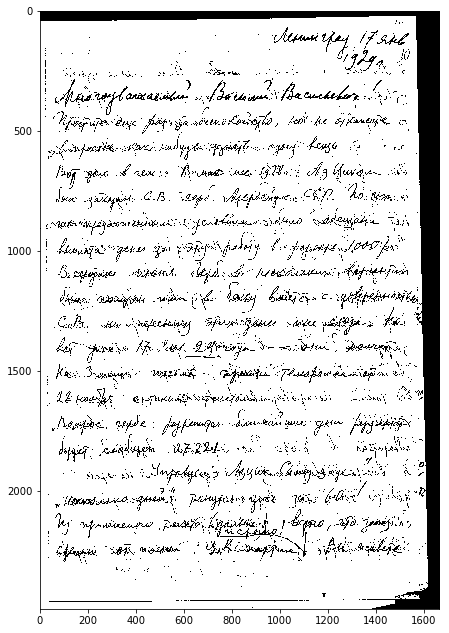

In [9]:
russian_black = color2black(russian,thresh=0.2)
plt.figure(figsize = (8.5,11))
plt.imshow(russian_black, cmap = 'Greys')
plt.show()

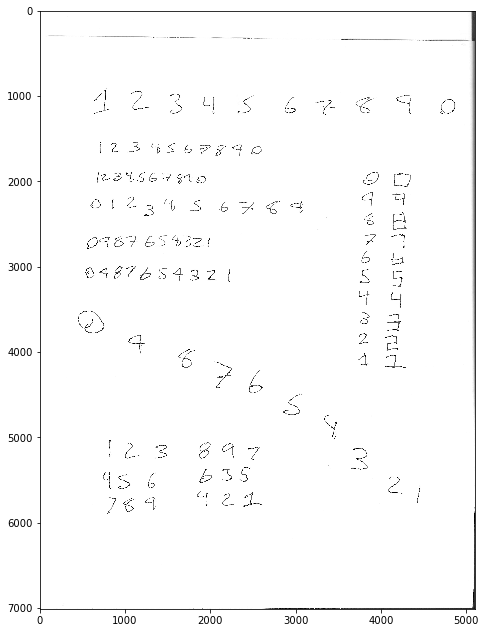

In [112]:
plt.figure(figsize=(8.5,11))
plt.imshow(nums_page_high)
plt.show()

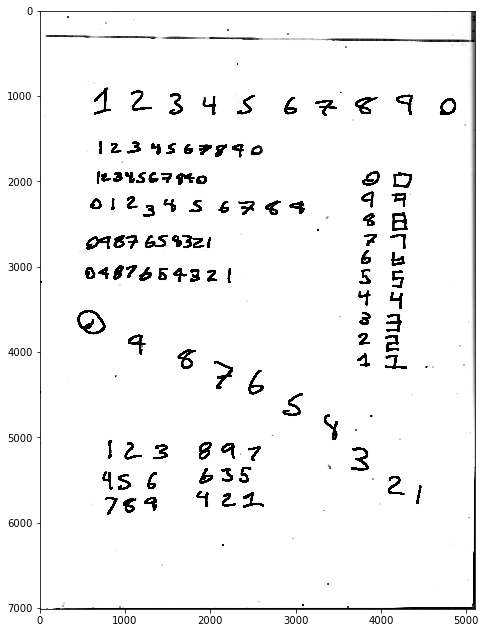

In [33]:
kernel = np.ones((4,4), np.uint8) 
nums_page_thick = cv2.erode(nums_page_high, kernel, iterations=6)
plt.figure(figsize=(8.5,11))
plt.imshow(nums_page_thick)
plt.show()

In [39]:
nums_slices = imgslicer(nums_page_high, start_fraction=0.2)

Flipping Black/White of this image


C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


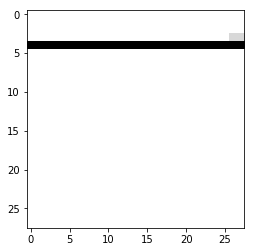

In [48]:
plt.figure()
plt.imshow(nums_slices[100], cmap = 'Greys')
plt.show()

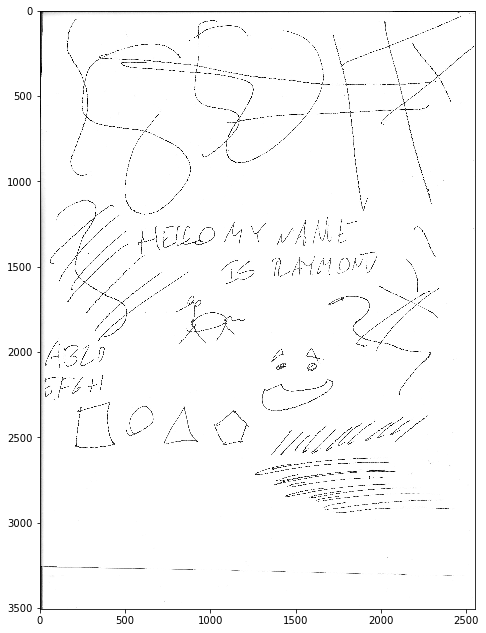

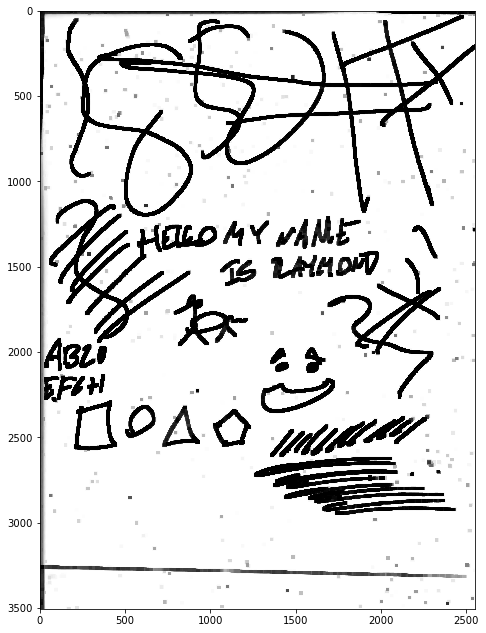

In [49]:
junk_page = mpi.imread('not numbers page.jpg')
kernel = np.ones((4,4), np.uint8) 
img = cv2.erode(junk_page, kernel, iterations=6) 
plt.figure(figsize = (8,11))
plt.imshow(junk_page)
plt.show()
plt.figure(figsize = (8,11))
plt.imshow(img)
plt.show()

In [10]:
junk_page.shape

(3506, 2550, 3)

In [38]:
def imgslicer(img, thresholds = [0.01, 0.2], start_fraction = 1):
    '''
    slices up an image into a whole bunch of increasingly smaller images
    first it thickens all text/lines on the page
    This could be a bad feature in the future
    resizes all the images to 28x28
    '''
    from skimage.transform import resize
    from skimage.color import rgb2grey
    from math import floor
    
    kernel = np.ones((4,4), np.uint8) 
    img = cv2.erode(img, kernel, iterations=6) 
    if len(img.shape) > 2:
        img = color2black(img)
    else:
        img = grey2black(img)
    
    #assuming image in dimensions: Y/X
    height = img.shape[0]
    width = img.shape[1]
    if height < 28 or width < 28:
        raise ValueError('gotta be a bigger picture m8ey')
    if height > width:
        edge = int(width*start_fraction*0.5)
    else: # W > H
        edge = int(height*start_fraction*0.5)
    
    collection = []
    shrink = 0.63212 # 1-1/e
    count = 0
    while edge >= 28 and count < 10:
        #iterate edge sizes
        stride = int(edge/4)
        vert_slices = floor(height/stride)
        horz_slices = floor(width/stride)
        #loop through the image
        for v in range(vert_slices):
            for h in range(horz_slices):
                topleft = [0+v*stride,0+h*stride]
                subimg = img[topleft[0]:topleft[0]+edge,
                             topleft[1]:topleft[1]+edge]
                if thresholds[0] < subimg.mean() < thresholds[1]: 
                    collection.append( resize(subimg, (28,28)))
        edge = int(edge*shrink)
        count += 1
    
    return np.array(collection)

In [75]:
def naieve_reader(img, start_fraction = 1, thresholds = [0.02, 0.25]):
    '''
    ACTUALLY TRIES TO READ THE DIGITS IN THE IMAGE!
    slices up an image into a whole bunch of increasingly smaller images
    first it thickens all text/lines on the page
    This could be a bad feature in the future
    resizes all the images to 28x28
    '''
    from skimage.transform import resize
    from skimage.color import rgb2grey
    from math import floor
    
    kernel = np.ones((4,4), np.uint8) 
    img = cv2.erode(img, kernel, iterations=6) 
    if len(img.shape) > 2:
        img = color2black(img)
    else:
        img = grey2black(img)
    
    #assuming image in dimensions: Y/X
    height = img.shape[0]
    width = img.shape[1]
    if height < 28 or width < 28:
        raise ValueError('gotta be a bigger picture m8ey')
    if height > width:
        edge = int(width*start_fraction*0.5)
    else: # W > H
        edge = int(height*start_fraction*0.5)
    
    collection = []
    nums = []
    probs = []
    shrink = 0.63212 # 1-1/e
    count = 0
    while edge >= 28 and count < 10:
        #iterate edge sizes
        stride = int(edge/4)
        vert_slices = floor(height/stride)
        horz_slices = floor(width/stride)
        #loop through the image
        for v in range(vert_slices):
            for h in range(horz_slices):
                topleft = [0+v*stride,0+h*stride]
                subimg = img[topleft[0]:topleft[0]+edge,
                             topleft[1]:topleft[1]+edge]
                subimg = resize(subimg, (28,28))
                if thresholds[0] < subimg.mean() < thresholds[1]: 
                    d, p = NN_predict(subimg, process = False)
                    if d != 10:
                        collection.append(subimg)
                        nums.append(d)
                        probs.append(p)
        edge = int(edge*shrink)
        count += 1
    
    return np.array(collection), np.array(nums), np.array(probs)

In [76]:
start = time()
collection, nums, probs = naieve_reader(nums_page_high, start_fraction = 0.2)
print(time()- start)

Flipping Black/White of this image


C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


964.992618560791


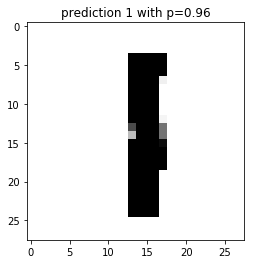

In [130]:
i=49
plt.figure()
plt.imshow(collection[i],cmap='Greys')
plt.title("prediction {0:.0f} with p={1:0.2f}".format(nums[i],probs[i]))
plt.show()

In [50]:
start = time()
junk_collection = imgslicer(junk_page, thresholds = [0,1])
print(time()-start)

Flipping Black/White of this image


C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


105.48935031890869


In [51]:
junk_collection.shape

(120951, 28, 28)

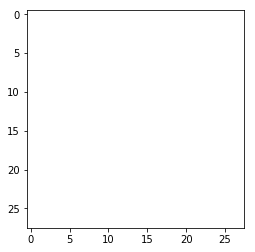

In [52]:
plt.imshow(junk_collection[3000], cmap = 'Greys')
plt.show()

In [53]:
np.random.shuffle(junk_collection)
junknum = junk_collection.shape[0]
junk_labels = np.ones((junknum,))*10
train_junk = junk_collection[:int(junknum*0.5)]
test_junk = junk_collection[int(junknum*0.5):]
train_junk_y = junk_labels[:int(junknum*0.5)]
test_junk_y = junk_labels[int(junknum*0.5):]

In [54]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test /255.0
x_train = np.concatenate((x_train,train_junk), axis=0)
x_test = np.concatenate((x_test,test_junk), axis=0)
y_train = np.concatenate((y_train,train_junk_y), axis=0)
y_test = np.concatenate((y_test,test_junk_y), axis = 0)

In [55]:
x_train[2].mean()

0.09725390156062426

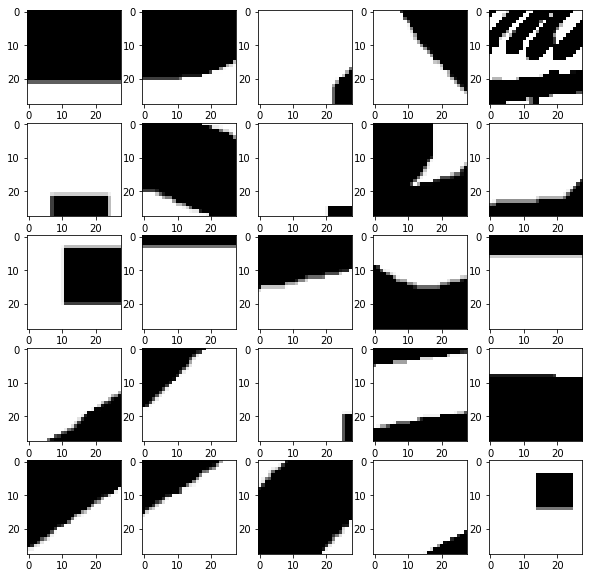

In [56]:
ones = x_train[y_train == 10]
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(ones[i], cmap = 'Greys')
plt.show()

In [57]:
#Simple single hidden-layer Dense Network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
120475/120475 [==============================] - 37s 303us/step - loss: 0.1138 - acc: 0.9676

[0.011603266080078832, 0.9969776945343095]

In [70]:
def color2black(img, thresh = 0.1):
    '''
    takes a numpy color image as input, returns image in black & white
    '''
    from skimage.color import rgb2grey
    return grey2black(rgb2grey(img), thresh=thresh)

def grey2black(img, thresh = 0.1):
    '''
    takes a numpy grayscale image as input (2 dimensions only)
    returns the image with any cell with value > threshold set to 1
    
    expects that the image is mostly whitespace. 
    if the image is more than half black, it flips white/black
    '''
    import numpy as np
    if not isinstance(img, np.ndarray):
        raise TypeError('Input Image must be numpy array')
    if len(img.shape) > 2:
        raise TypeError('Input Image must only have 2 dimensions')
        
    if np.mean(img) >= 0.5:
        img = 1-img
        print('Flipping Black/White of this image')
        
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if img[row,col] > thresh:
                img[row,col] = 1
            else:
                img[row,col] = 0
    return img


def NN_predict(img, return_img = False, process = True):
    '''
    Takes in an image, formats it, and gives the NN digit prediction
    '''
    from skimage.transform import resize
    from skimage.color import rgb2grey #note- rgb2grey calculates illuminance (so full white is == 1)
    import matplotlib.pyplot as plt
    import cv2
    
    if process:
        kernel = np.ones((4,4), np.uint8) 
        img = cv2.erode(img, kernel, iterations=4) 
        img = grey2black(resize(grey2black(rgb2grey(img)),(28,28)))
    
    prediction = model.predict(img.reshape(1,28,28))[0]    
    digit = prediction.argmax()
    probability = prediction[digit]
    if not return_img:
        return digit, probability
    else:
        return digit, probability, img_bw

def plot_predict(img):
    '''
    Takes in an image, and plots it along with the NN digit prediction
    '''
    from skimage.transform import resize
    from skimage.color import rgb2grey #note- rgb2grey calculates illuminance (so full white is == 1)
    import matplotlib.pyplot as plt
    import cv2
    
    digit, probability, img_bw = NN_predict(img, True)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img, cmap = 'Greys')
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(img_bw, cmap = 'Greys')
    plt.title('Reduced, GrayScale')
    plt.suptitle("Predicted to be a {:d} with probability: {:.2f}".format(digit, probability))
    plt.show()

Flipping Black/White of this image


C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


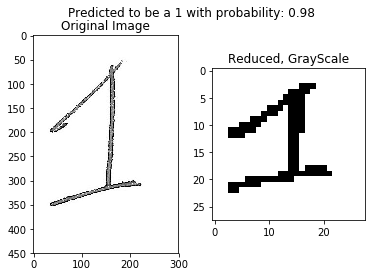

In [58]:
plot_predict(big_1_hq)

C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


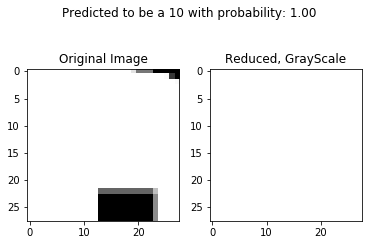

In [64]:
plot_predict(test_junk[5220])

# Moving Forward

Clearly there are some problems with just using the raw image with no feature extraction and a simple dense NN. Possible ways to improve:
- Resizing procedure! Clearly not working
- expansion on the image- thickening the text
- Convolutional NN
- Feature Extraction (such as HOG)

# Playing around with HOG

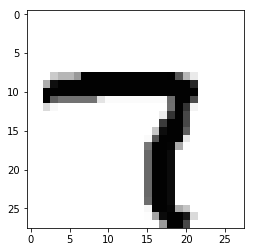

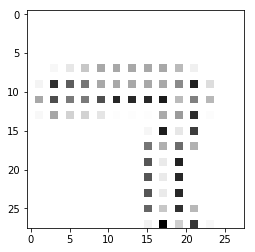

In [10]:
import matplotlib.pyplot as plt
img = x_train[23000]
plt.imshow(img, cmap = 'Greys')
plt.show()

from skimage.morphology import skeletonize, medial_axis
from skimage.feature import hog
from skimage import exposure

#skele= skeletonize(img)
#med = medial_axis(img)
fv, hog = hog(img,feature_vector= False, visualise = True,
             pixels_per_cell = (2,2), cells_per_block = (3,3), block_norm = 'L2-Hys')

#plt.imshow(skele, cmap = 'Greys')
#plt.show()
#plt.imshow(med, cmap = 'Greys')
#plt.show()
plt.imshow(hog, cmap = 'Greys')
plt.show()

In [11]:
from time import time
from skimage.feature import hog as hist_grad
start = time()
x_train_processed = []
for i in range(100):
    img = x_train[i]
    fv, hog = hist_grad(img, feature_vector= False, visualise = True, pixels_per_cell = (2,2), cells_per_block = (3,3), block_norm = 'L2-Hys')
    x_train_processed.append(hog)

x_train_processed = np.array(x_train_processed)
duration = time() - start
print(duration)

4.144976377487183
